<a href="https://colab.research.google.com/github/ChoHyeonJun86/deeplearning-prac/blob/main/250514_convolution_neural_network_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 이미지를 인식하는 원리

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys
import numpy as np

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


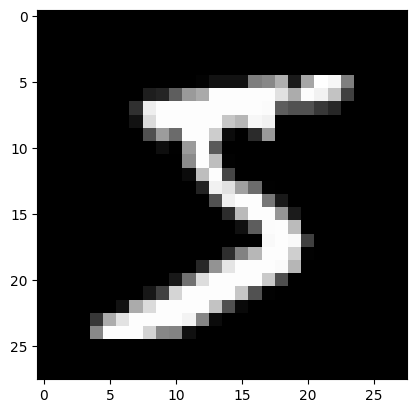

In [18]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [19]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [33]:
# 정렬 예제
variable = 123456789  #인식하기 쉬운 형태로 정렬하기 하기위한 예제

print("%20s" % variable)
print("%-20s" % variable)

           123456789
123456789           


In [21]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)  #___ 3자리를 왼쪽(-)부터 채움으로써 인식하기 쉬운 형태로 정렬
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [22]:
X_train = X_train.reshape(-1, 784) # 784 = 28*28
X_train.shape

(60000, 784)

In [23]:
# 스케일링, 0~255->0~1
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(-1, 784).astype('float64') / 255

In [24]:
print("class : %d " % (y_train[0]))

#원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 다층 퍼셉트론으로 분류

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os

# 모델 정의
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
modelpath="./MNIST_MLP.keras" #verbose=1 일 때 세부사항 출력, =0 일 때 세부사항 출력 X
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18524, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18524 to 0.13348, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13348 to 0.10857, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.10857 to 0.09569, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09569 to 0.09289, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09289 to 0.08651, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08651

Epoch 8: val_loss improved from 0.08651 to 0.07868, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.07868

Epoch 10: val_loss did not improve from 0.07868

Epoch 11: val_loss did not improve from 0.07868

Epoch 12: val_loss improved from 0.07868 to 0.07812, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss did not improve from 0.07812

Epoch 14: val_loss did not improve from 0.07812

Epoch 15: val_

In [27]:
# 검증 데이터셋과 학습 데이터셋의 오차 각각 저장 후 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [28]:
y_loss

[0.3425610363483429,
 0.14534226059913635,
 0.09699226170778275,
 0.07027959078550339,
 0.05188373103737831,
 0.04050397500395775,
 0.03288671746850014,
 0.024833040311932564,
 0.018727434799075127,
 0.013635064475238323,
 0.011312180198729038,
 0.008957426995038986,
 0.006062824744731188,
 0.005541193298995495,
 0.0047937375493347645,
 0.0031961998902261257,
 0.002503650728613138,
 0.0018183314241468906,
 0.001442853594198823,
 0.0012262462405487895,
 0.001054040971212089,
 0.0008806778932921588]

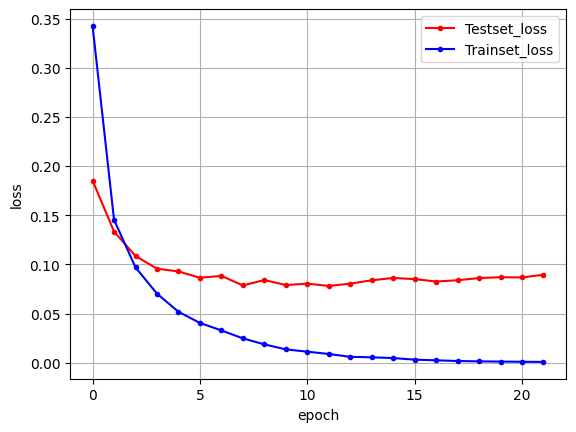

In [29]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망

확인 문제1 : 출력층의 활성화 함수에 들어갈 빈칸을 채우고 이유를 설명하세요

- 이유 : 각각의 레이블에 저장할 때 다중분류가 활용되므로 softmax를 사용해야 한다.

확인 문제 2 : 풀링 크기를 (2,2)에서 더 크게 변경하면 모델에 어떤 영향을 미칠지 적어보세요

- 정답 : 많은 데이터가 손실될 것이므로, 과소적합될 것으로 예상된다.

In [30]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08204, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08204 to 0.05847, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05847 to 0.05200, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss did not improve from 0.05200

Epoch 5: val_loss improved from 0.05200 to 0.04903, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04903 to 0.04791, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04791 to 0.04540, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.04540

Epoch 9: val_loss did not improve from 0.04540

Epoch 10: val_loss improved from 0.04540 to 0.04234, saving model to ./MNIST_CNN.keras

Epoch 11: val_loss did not improve from 0.04234

Epoch 12: val_loss did not improve from 0.04234

Epoch 13: val_loss did not improve from 0.04234

Epoch 14: val_loss did not improve from 0.04234

Epoch 15: val_loss did not improve from 0.04234

Epoc

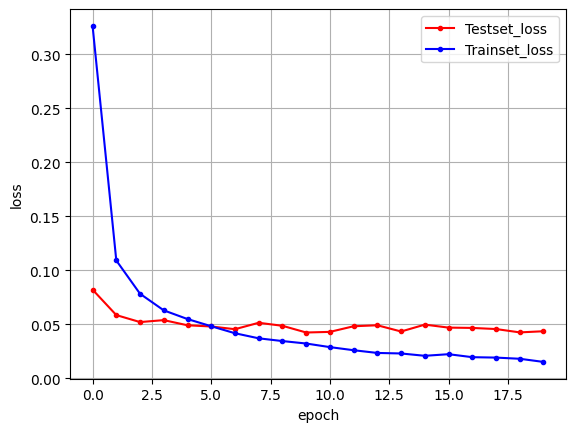

In [32]:
# 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 다층 퍼셉트론과 컨볼루션 신경망의 결과를 비교해보세요

두 그래프의 차이가 줄어드는 모습을 확인할 수 있는 것으로 보아 과적합을 피했다고 볼 수 있다.